In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

# Create Linear Dataset

In [25]:
from sklearn.datasets import make_regression

X,y,coef=make_regression(n_samples=100,n_features=1,coef=True)

In [24]:
y.shape

(100,)

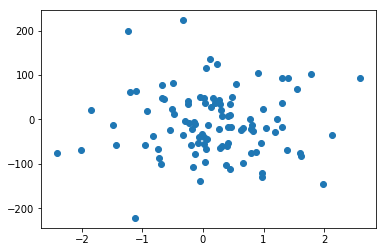

In [22]:
plt.scatter(x,y)

# Scikit-learn LinearRegression as Baseline

In [15]:
from sklearn.linear_model import LinearRegression

clf_sklearn=LinearRegression()

# Linear Regression

In [16]:
class Model(object):
    def __init__(self,learning_rate=0.1,epochs=10):
        self.learning_rate=learning_rate
        self.epochs=epochs
    
    def fit(self,X,y):
        self.X=tf.convert_to_tensor(X,dtype=tf.float64)
        self.y=tf.convert_to_tensor(y,dtype=tf.float64)
        
        if tf.rank(self.X).numpy()==1:
            self.X=tf.reshape(self.X,shape=(self.X.shape[0],1))
            self.y=tf.reshape(self.y,shape=(self.y.shape[0],1))
            
        self.W=tf.Variable(tf.random.normal(shape=[self.X.shape[1],1],dtype=tf.float64),dtype=tf.float64)
        self.b=tf.Variable(tf.random.normal(shape=[1],dtype=tf.float64),dtype=tf.float64)
        
        self.history={"epochs":[],"loss":[]}
        
        for epoch in range(self.epochs):
            self.history["epochs"].append(epoch)

            
            with tf.GradientTape() as tape:
                loss_temp=self.loss(tf.matmul(self.X,self.W)+self.b,self.y)
            self.history["loss"].append(loss_temp.numpy())
            dW,db=tape.gradient(loss_temp,[self.W,self.b])
            self.W.assign_sub(self.learning_rate * dW)
            self.b.assign_sub(self.learning_rate * db)
        
    def predict(self,X_pred):
        X_pred=tf.convert_to_tensor(X_pred,dtype=tf.float64)
        if tf.rank(X_pred).numpy()==1:
            X_pred=tf.reshape(X_pred,shape=(X_pred.shape[0],1))
        return tf.matmul(X_pred,self.W)+self.b
    
    def loss(self,y_pred,y_true):
        return tf.reduce_mean(tf.square(y_pred-y_true))
    
clf=Model(epochs=40)    
clf.fit(x,y)

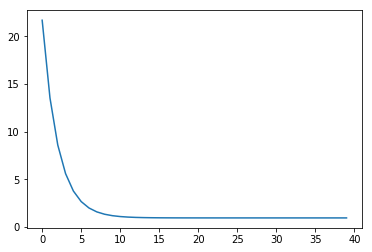

In [17]:
plt.plot(clf.history["epochs"],clf.history["loss"])

In [18]:
print(clf.W)
print(clf.b)

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[3.13495231]])>
<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([2.12374263])>


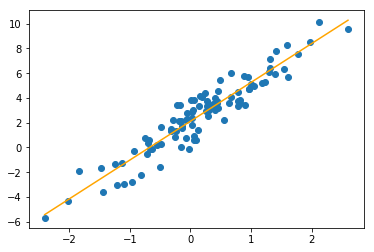

In [19]:
fig,ax=plt.subplots()
ax.scatter(x,y)
x_test=np.linspace(np.min(x),np.max(x),10)
ax.plot(x_test,clf.predict(x_test),c="orange")

In [20]:
W = np.array([3.0,3.0]).reshape(-1,1)
b = 2.0
num_points= 100

noise=np.random.normal(size=num_points)
x2=np.random.normal(size=(num_points,2))
y2 = x2.dot(W)+2
clf=Model(epochs=40)    
clf.fit(x2,y2)

In [9]:
y2.shape

(100, 1)

In [10]:
print(clf.W)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.99800897],
       [3.00023808]])>


In [11]:
clf.b

<tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([1.99910026])>

In [12]:
from sklearn.linear_model import LinearRegression

clf=LinearRegression()
clf.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
clf.coef_

array([[3., 3.]])

In [14]:
clf.intercept_

array([2.])